# Problem statement:
In the rapidly evolving banking sector, customer retention has become a critical concern. Banks are increasingly seeking to understand the factors that influence customer decisions to stay with or leave their banking service provider. This project focuses on analyzing a dataset containing various attributes of bank customers to identify key predictors of customer churn. By leveraging data analytics, we aim to uncover patterns and insights that could help devise strategies to enhance customer retention and reduce churn rates.

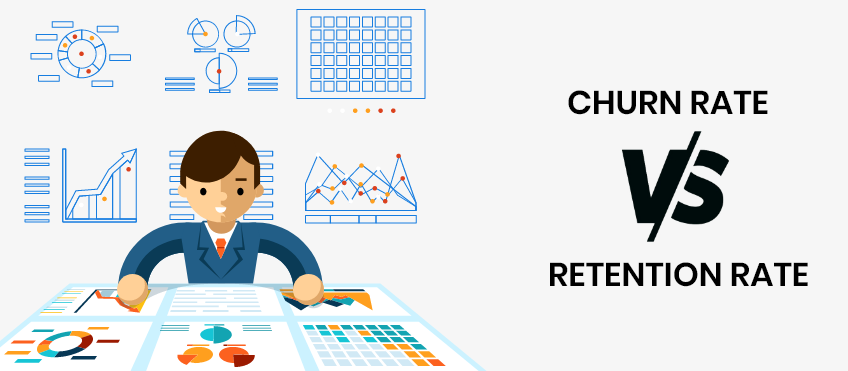

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
!gdown 1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W

Downloading...
From: https://drive.google.com/uc?id=1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 109MB/s]


In [ ]:
data=pd.read_csv('/content/Bank-Records.csv')
print("Dataset read succesfully")

Dataset read succesfully


In [ ]:
df=data.copy()

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [ ]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Observations:

Dataset has been thoroughly checked, confirming that it does not contain any null values or duplicate entries

In [ ]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Some insights about the target variable

In [ ]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

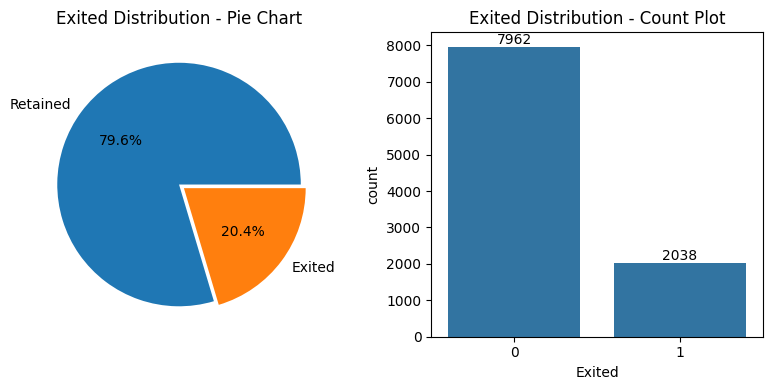

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
p=df['Exited'].value_counts()
plt.pie(p,labels=['Retained','Exited'],autopct='%1.1f%%',explode=[0,0.05])
plt.title('Exited Distribution - Pie Chart')


plt.subplot(1,2,2)
ax = sns.countplot(x='Exited', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Exited Distribution - Count Plot')

plt.tight_layout()
plt.show()

# Observation:
An analysis of the data reveals that 79.6% of customers are retained, indicating a strong retention rate, while 20.4% of customers have exited, highlighting the need for strategies to reduce churn.

In [ ]:
# binning for age
bins=[18,30,40,50,60,70]
labels=['18-30','30-40','40-50','50-60','60-70']
df['Age_group']=pd.cut(df['Age'],bins=bins,labels=labels)

In [ ]:
# seperating categorical and numerical columns
df_cat=df[['Geography','Gender','Card Type','Age_group','NumOfProducts','HasCrCard','IsActiveMember','Complain','Satisfaction Score','Exited']]
df_num=df[['Age','CreditScore','Tenure','Balance','EstimatedSalary','Point Earned']]

1. Descriptive Statistics

Basic Statistics:

In [ ]:
df_num.describe()

Age   CreditScore        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean      38.921800    650.528800      5.012800   76485.889288   
std       10.487806     96.653299      2.892174   62397.405202   
min       18.000000    350.000000      0.000000       0.000000   
25%       32.000000    584.000000      3.000000       0.000000   
50%       37.000000    652.000000      5.000000   97198.540000   
75%       44.000000    718.000000      7.000000  127644.240000   
max       92.000000    850.000000     10.000000  250898.090000   

       EstimatedSalary  Point Earned  
count     10000.000000  10000.000000  
mean     100090.239881    606.515100  
std       57510.492818    225.924839  
min          11.580000    119.000000  
25%       51002.110000    410.000000  
50%      100193.915000    605.000000  
75%      149388.247500    801.000000  
max      199992.480000   1000.000000

In [ ]:
df_cat.describe()

NumOfProducts    HasCrCard  IsActiveMember      Complain  \
count   10000.000000  10000.00000    10000.000000  10000.000000   
mean        1.530200      0.70550        0.515100      0.204400   
std         0.581654      0.45584        0.499797      0.403283   
min         1.000000      0.00000        0.000000      0.000000   
25%         1.000000      0.00000        0.000000      0.000000   
50%         1.000000      1.00000        1.000000      0.000000   
75%         2.000000      1.00000        1.000000      0.000000   
max         4.000000      1.00000        1.000000      1.000000   

       Satisfaction Score        Exited  
count        10000.000000  10000.000000  
mean             3.013800      0.203800  
std              1.405919      0.402842  
min              1.000000      0.000000  
25%              2.000000      0.000000  
50%              3.000000      0.000000  
75%              4.000000      0.000000  
max              5.000000      1.000000

Distribution Analysis:

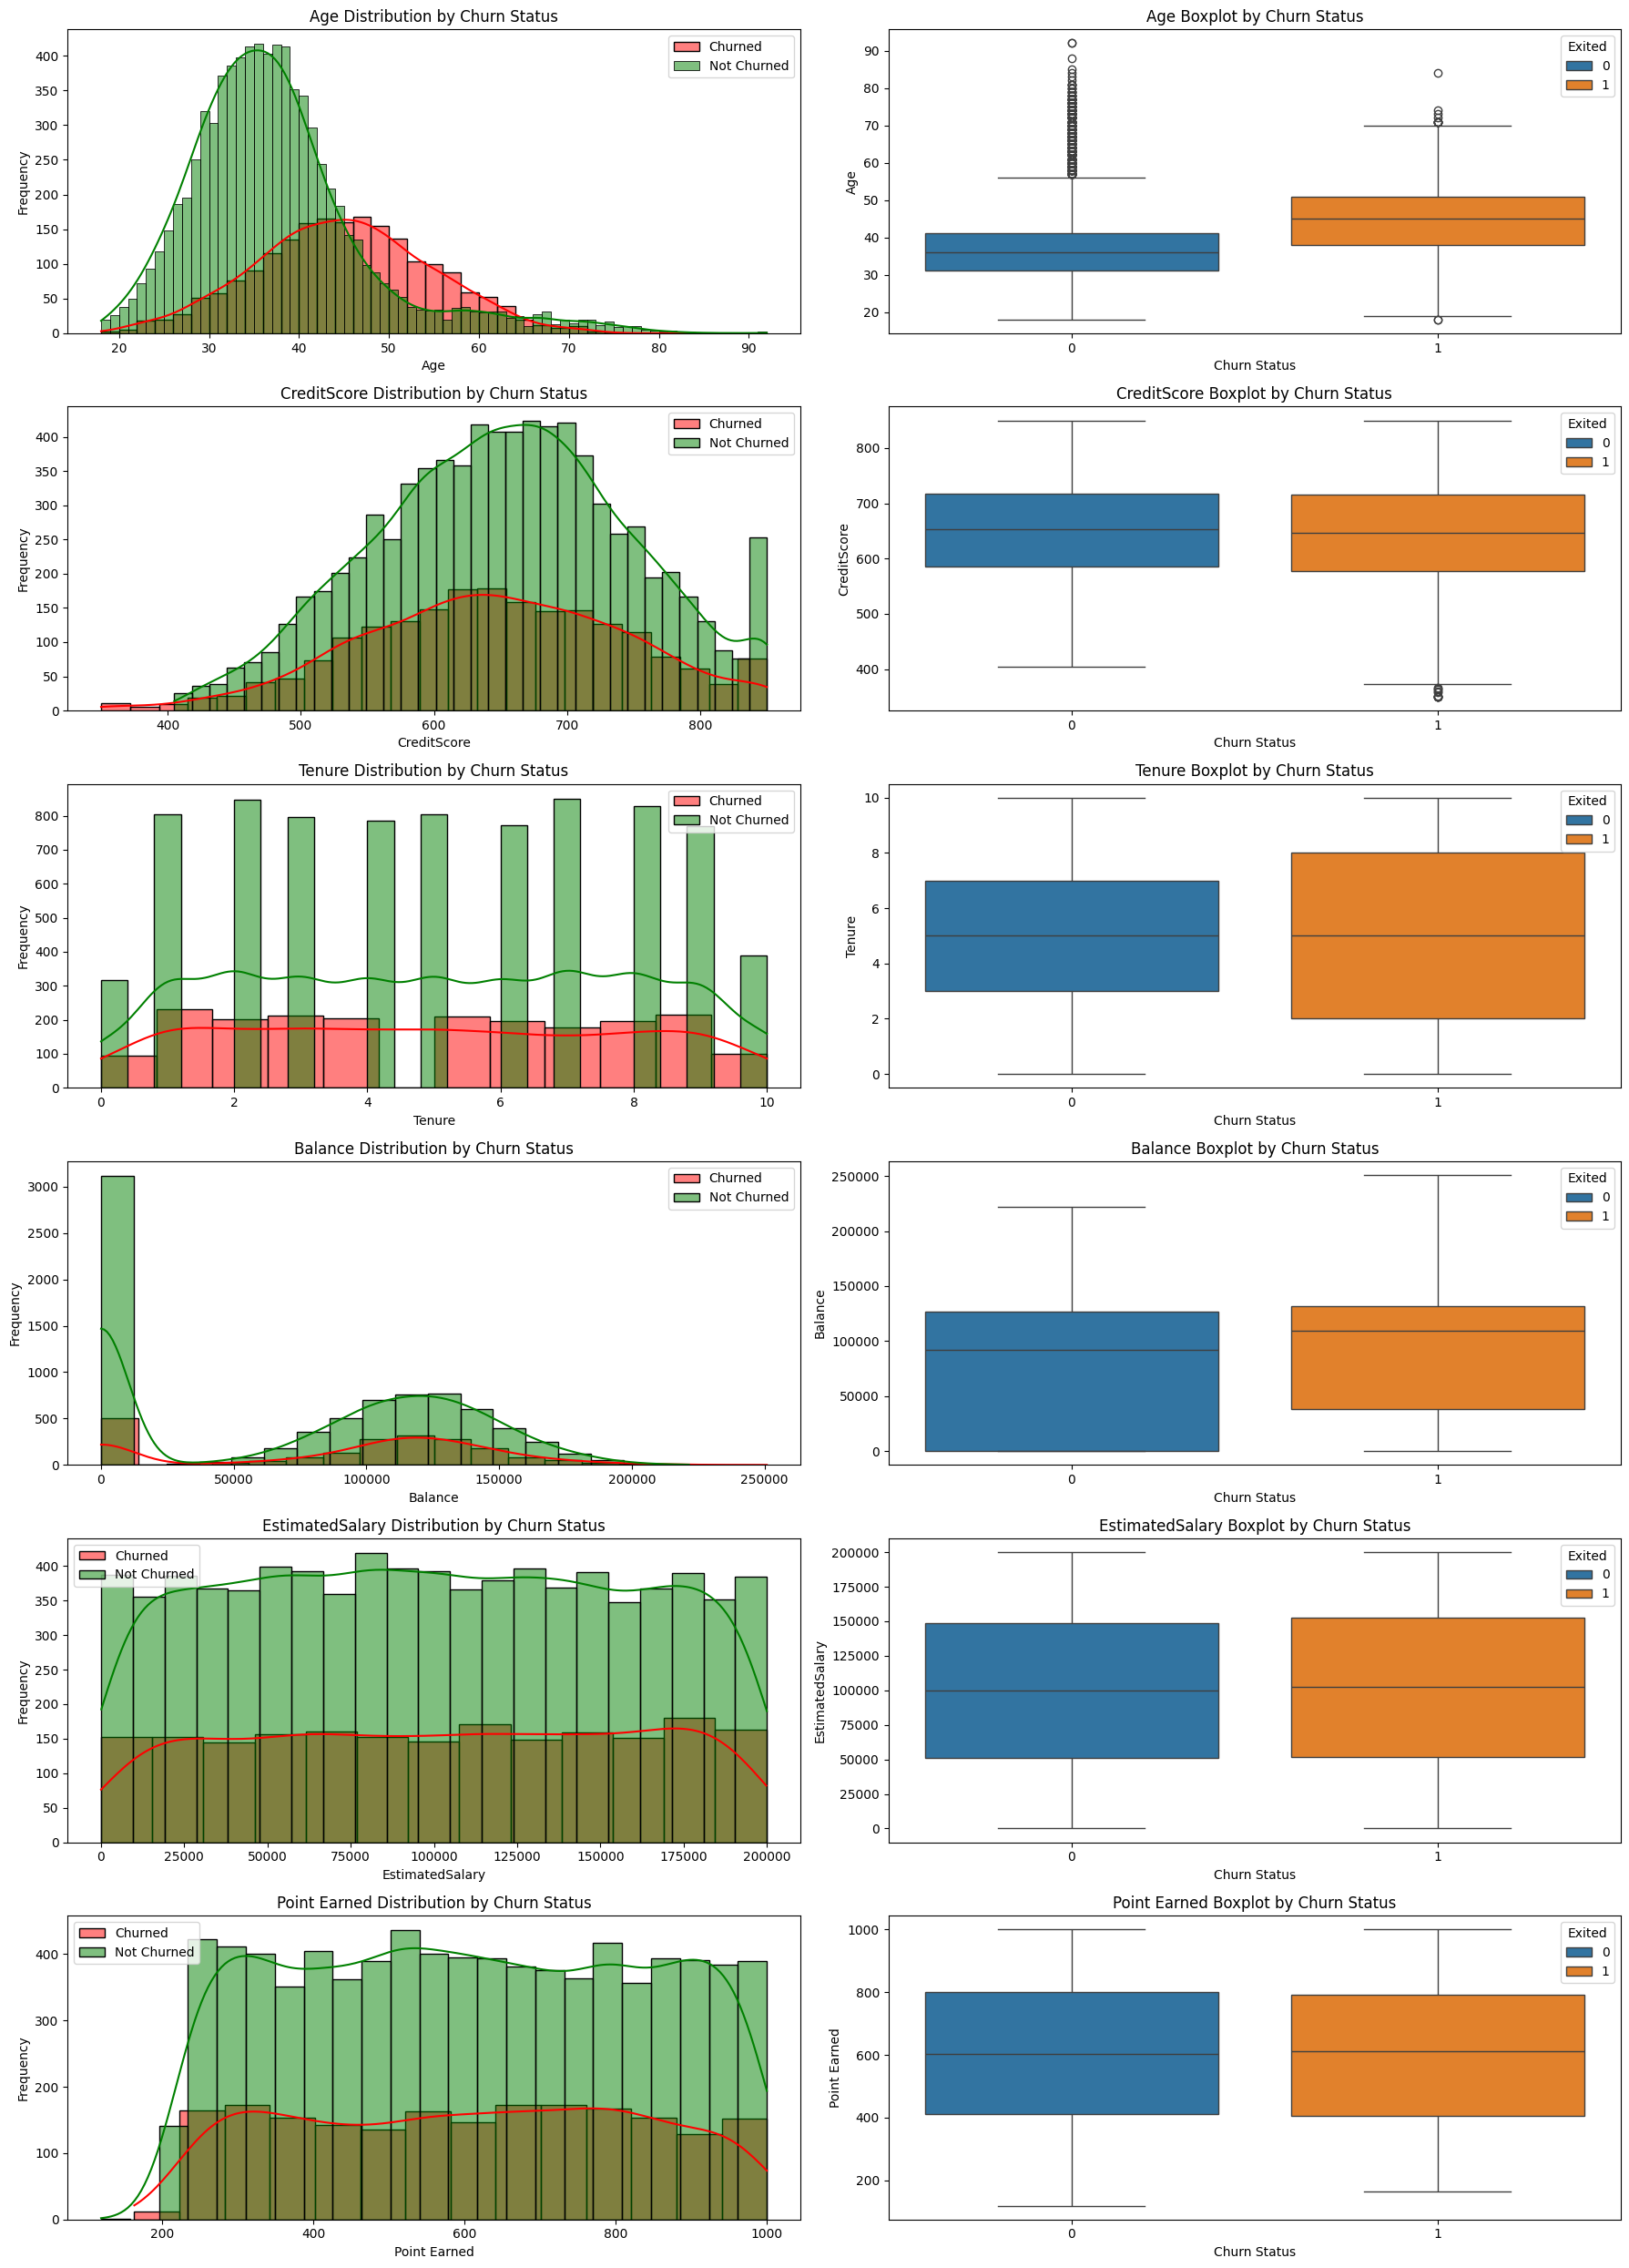

In [ ]:
plt.figure(figsize=(18,25))
cols=list(df_num.columns)
for i in cols:

  plt.subplot(6,2,2*cols.index(i)+1)
  sns.histplot(df[df['Exited'] == 1][i], kde=True, color='red', label='Churned')
  sns.histplot(df[df['Exited'] == 0][i], kde=True, color='green', label='Not Churned')
  plt.legend()
  plt.title(f'{i} Distribution by Churn Status')
  plt.xlabel(i)
  plt.ylabel('Frequency')

  plt.subplot(6,2,2*cols.index(i)+2)
  sns.boxplot(x='Exited', y=i,hue='Exited', data=df)
  plt.title(f'{i} Boxplot by Churn Status')
  plt.xlabel('Churn Status')
  plt.ylabel(i)

plt.tight_layout()

plt.show()

# Observations:

* Age:
   * Distribution Analysis: Older customers tend to have higher churn rates.
   * Central Tendency and Spread: The mean age of churned customers is higher than that of non-churned customers.

* Balance:
   * Distribution Analysis: Customers with higher balances are more likely to churn.
   * Central Tendency and Spread: The median balance is higher for churned customers.

* Credit Score:
   * Distribution Analysis: No significant difference in credit score distributions between churned and non-churned customers.
   * Central Tendency and Spread: Similar median credit scores for both categories.

* Estimated Salary and Ponits Earned:
   * Distribution Analysis: Similar distribution of estimated salaries for both churned and non-churned customers.
   * Central Tendency and Spread: Similar median estimated salaries for both categories.

* Tenure:
   * Distribution Analysis:The histogram and boxplot show that customers with shorter tenures tend to have higher churn rates. This suggests that newer customers are more likely to leave.
   * Central Tendency and Spread:The mean and median tenure of churned customers are lower than those of non-churned customers, indicating that longer tenure is associated with higher retention.

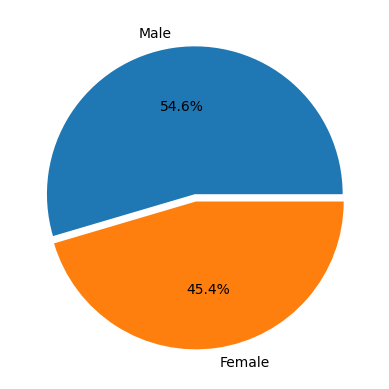

In [ ]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',explode=[0,0.05])
plt.show()

# Observation:

Our dataset contains 45.4% Females and 54.6% Males

In [ ]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
IQR

CreditScore              134.0000
Age                       12.0000
Tenure                     4.0000
Balance               127644.2400
NumOfProducts              1.0000
HasCrCard                  1.0000
IsActiveMember             1.0000
EstimatedSalary        98386.1375
Exited                     0.0000
Complain                   0.0000
Satisfaction Score         2.0000
Point Earned             391.0000
dtype: float64

In [ ]:
df_num.skew()

Age                1.011320
CreditScore       -0.071607
Tenure             0.010991
Balance           -0.141109
EstimatedSalary    0.002085
Point Earned       0.008344
dtype: float64

In [ ]:
df_num.kurt()

Age                1.395347
CreditScore       -0.425726
Tenure            -1.165225
Balance           -1.489412
EstimatedSalary   -1.181518
Point Earned      -1.193781
dtype: float64

2. Exploratory Data Analysis (EDA)

Correlation Analysis:

In [ ]:
df_c=df.select_dtypes(include=['number']).drop(['RowNumber','CustomerId'],axis=1)
df_c.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                   -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                 0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance                0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts          0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard             -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember         0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary       -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited                -0.026771  0.285296 -0.013656  0.118577      -0.047611   
Complain              -0.027048  0.283530 -0.013047  0.119124      -0.046357   
Satisfaction Score    -0.012599 -0.000876  0.008663 -0.002588      -0.011394   
Point Earned           0.000077  0.002222 -0.010196  0.014608      -0.015330   

                    HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
CreditScore         -0.005458        0.025651        -0.001384 -0.026771   
Age                 -0.011721        0.085472        -0.007201  0.285296   
Tenure               0.022583       -0.028362         0.007784 -0.013656   
Balance             -0.014858       -0.010084         0.012797  0.118577   
NumOfProducts        0.003183        0.009612         0.014204 -0.047611   
HasCrCard            1.000000       -0.011866        -0.009933 -0.006976   
IsActiveMember      -0.011866        1.000000        -0.011421 -0.156356   
EstimatedSalary     -0.009933       -0.011421         1.000000  0.012490   
Exited              -0.006976       -0.156356         0.012490  1.000000   
Complain            -0.007095       -0.154741         0.012494  0.995693   
Satisfaction Score  -0.000212        0.010236        -0.013747 -0.005849   
Point Earned        -0.011041       -0.004983        -0.001515 -0.004628   

                    Complain  Satisfaction Score  Point Earned  
CreditScore        -0.027048           -0.012599      0.000077  
Age                 0.283530           -0.000876      0.002222  
Tenure             -0.013047            0.008663     -0.010196  
Balance             0.119124           -0.002588      0.014608  
NumOfProducts      -0.046357           -0.011394     -0.015330  
HasCrCard          -0.007095           -0.000212     -0.011041  
IsActiveMember     -0.154741            0.010236     -0.004983  
EstimatedSalary     0.012494           -0.013747     -0.001515  
Exited              0.995693           -0.005849     -0.004628  
Complain            1.000000           -0.004799     -0.002893  
Satisfaction Score -0.004799            1.000000     -0.014400  
Point Earned       -0.002893           -0.014400      1.000000

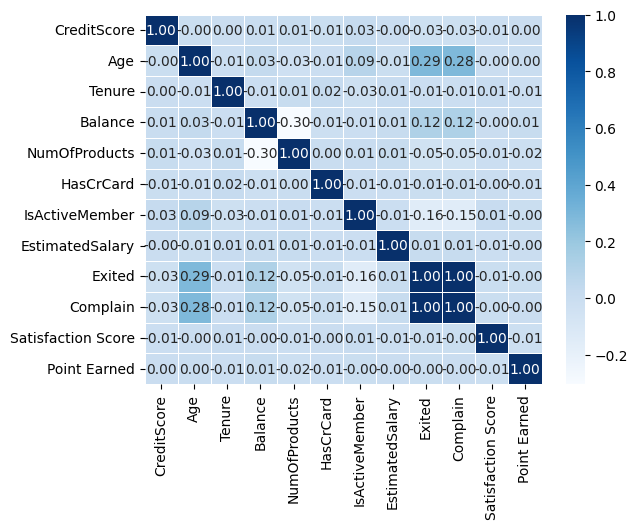

In [ ]:
sns.heatmap(df_c.corr(),annot=True,fmt=".2f", cmap="Blues",  linewidths=0.5)
plt.show()

#Observation:
* Exited and Complian are high correlated with each other,suggesting that customers who have exited are more likely to have lodged complaints.

* Balance and Age are positively correlated with Exited.

* Estimated Salary is weakly correlated with Exited.

* Exited has negative correlation with Number of Products

Customer Profile Analysis:

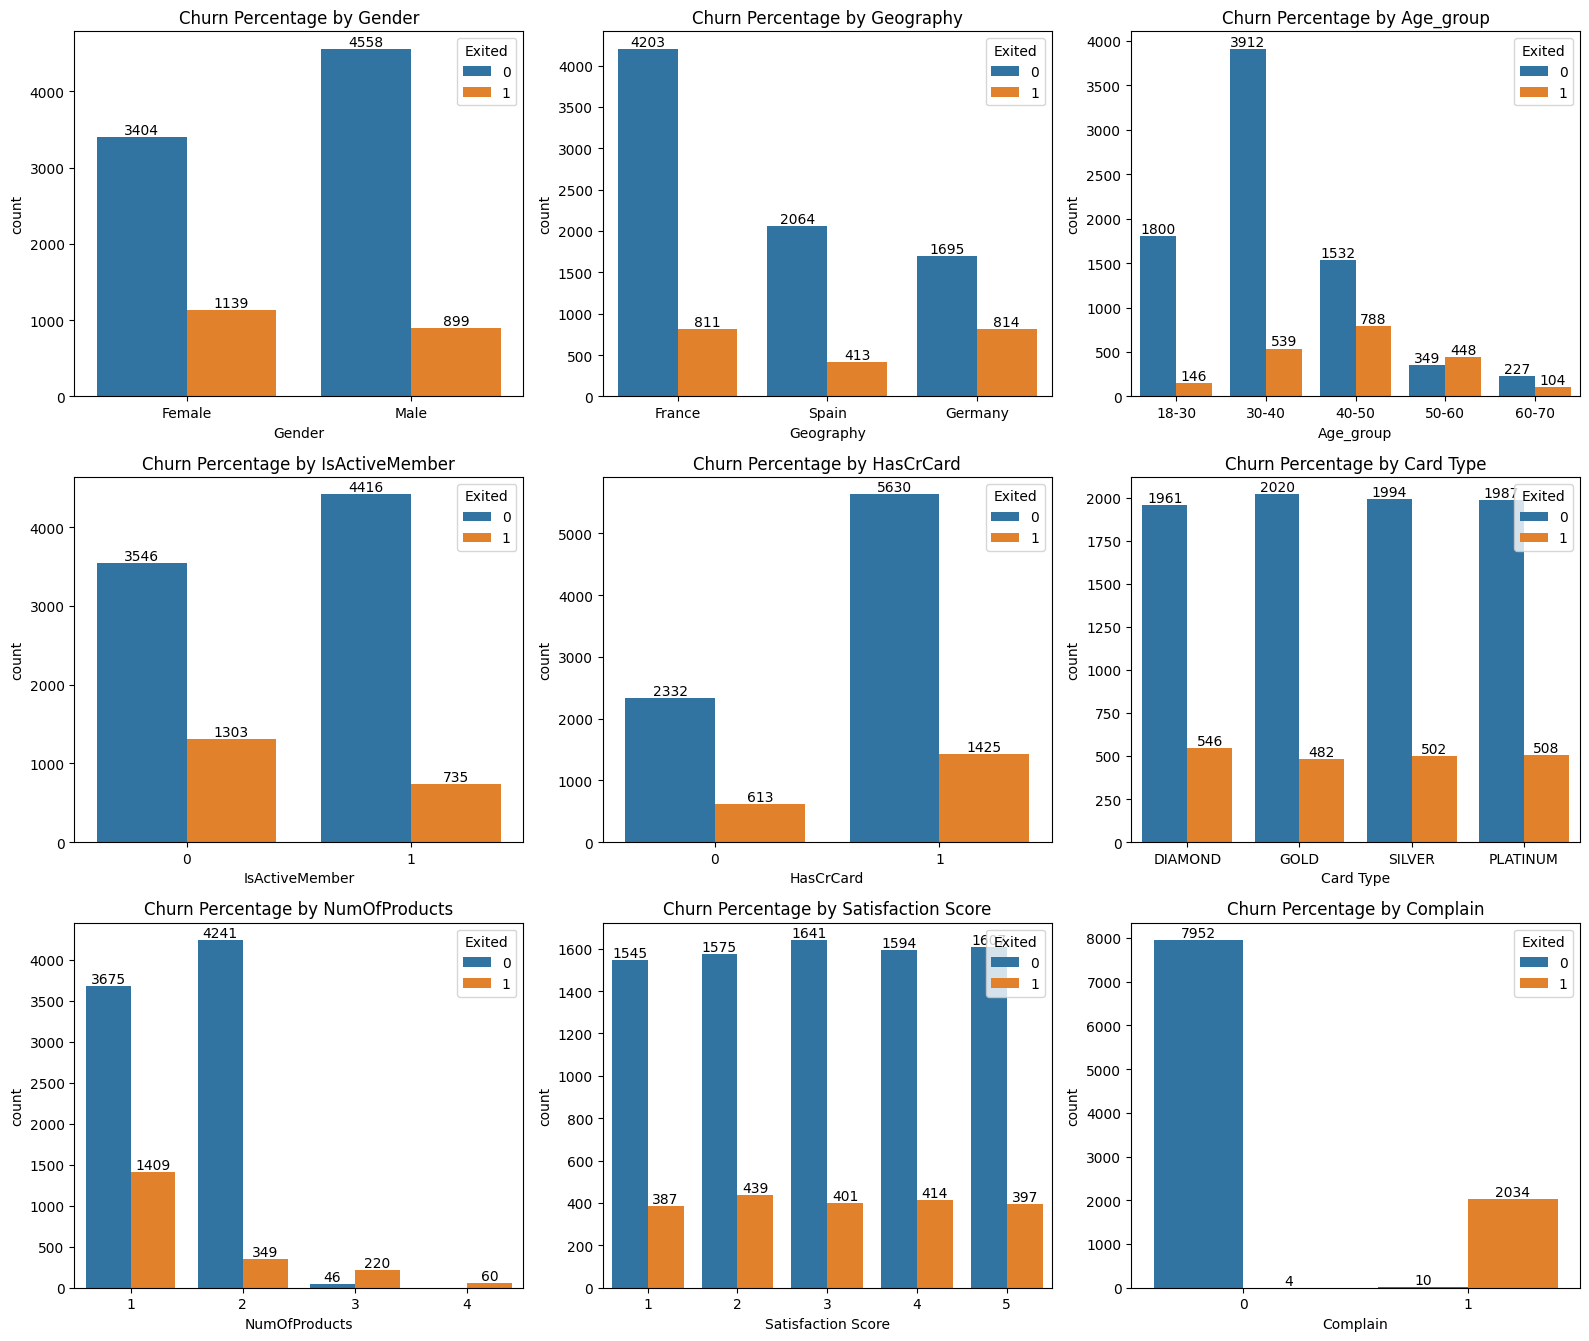

In [ ]:
plt.figure(figsize=(16,22))

cols = ['Gender', 'Geography','Age_group','IsActiveMember','HasCrCard','Card Type', 'NumOfProducts', 'Satisfaction Score', 'Complain']

for i in cols:

  plt.subplot(5,3,cols.index(i)+1)
  plt.title('Churn Percentage by '+i)
  g = sns.countplot(df, x=i, hue='Exited')

  for bars in g.containers:
    g.bar_label(bars)

plt.tight_layout()
plt.show()

Chi-Square test between Age group, Geography, Gender and Exited

In [ ]:
# H0: Age group and Exited are not dependent
# H1: Age group and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['Age_group'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, Age group and Exited are dependent")
else:
  print("Failed to Reject H0,Age group and Exited are not dependent")

Chi_Statistcs: 1296.699793614777

P_Value: 1.7286069304088523e-279

Degree of Freedom: 4

Expected_Value: [[1545.73082783  400.26917217]
 [3535.48197054  915.51802946]
 [1842.80345353  477.19654647]
 [ 633.06653123  163.93346877]
 [ 262.91721686   68.08278314]]

Reject H0, Age group and Exited are dependent


In [ ]:
# H0: Geography and Exited are not dependent
# H1: Geography and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['Geography'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, Geography and Exited are dependent")
else:
  print("Failed to Reject H0 Geography and Exited are not dependent")

Chi_Statistcs: 300.6264011211942

P_Value: 5.245736109572763e-66

Degree of Freedom: 2

Expected_Value: [[3992.1468 1021.8532]
 [1997.6658  511.3342]
 [1972.1874  504.8126]]

Reject H0, Geography and Exited are dependent


In [ ]:
# H0: Gender and Exited are not dependent
# H1: Gender and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['Gender'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, Gender and Exited are dependent")
else:
  print("Failed to Reject H0, Gender and Exited are not dependent")

Chi_Statistcs: 112.39655374778587

P_Value: 2.9253677618642e-26

Degree of Freedom: 1

Expected_Value: [[3617.1366  925.8634]
 [4344.8634 1112.1366]]

Reject H0, Gender and Exited are dependent


3. Comparative Analysis

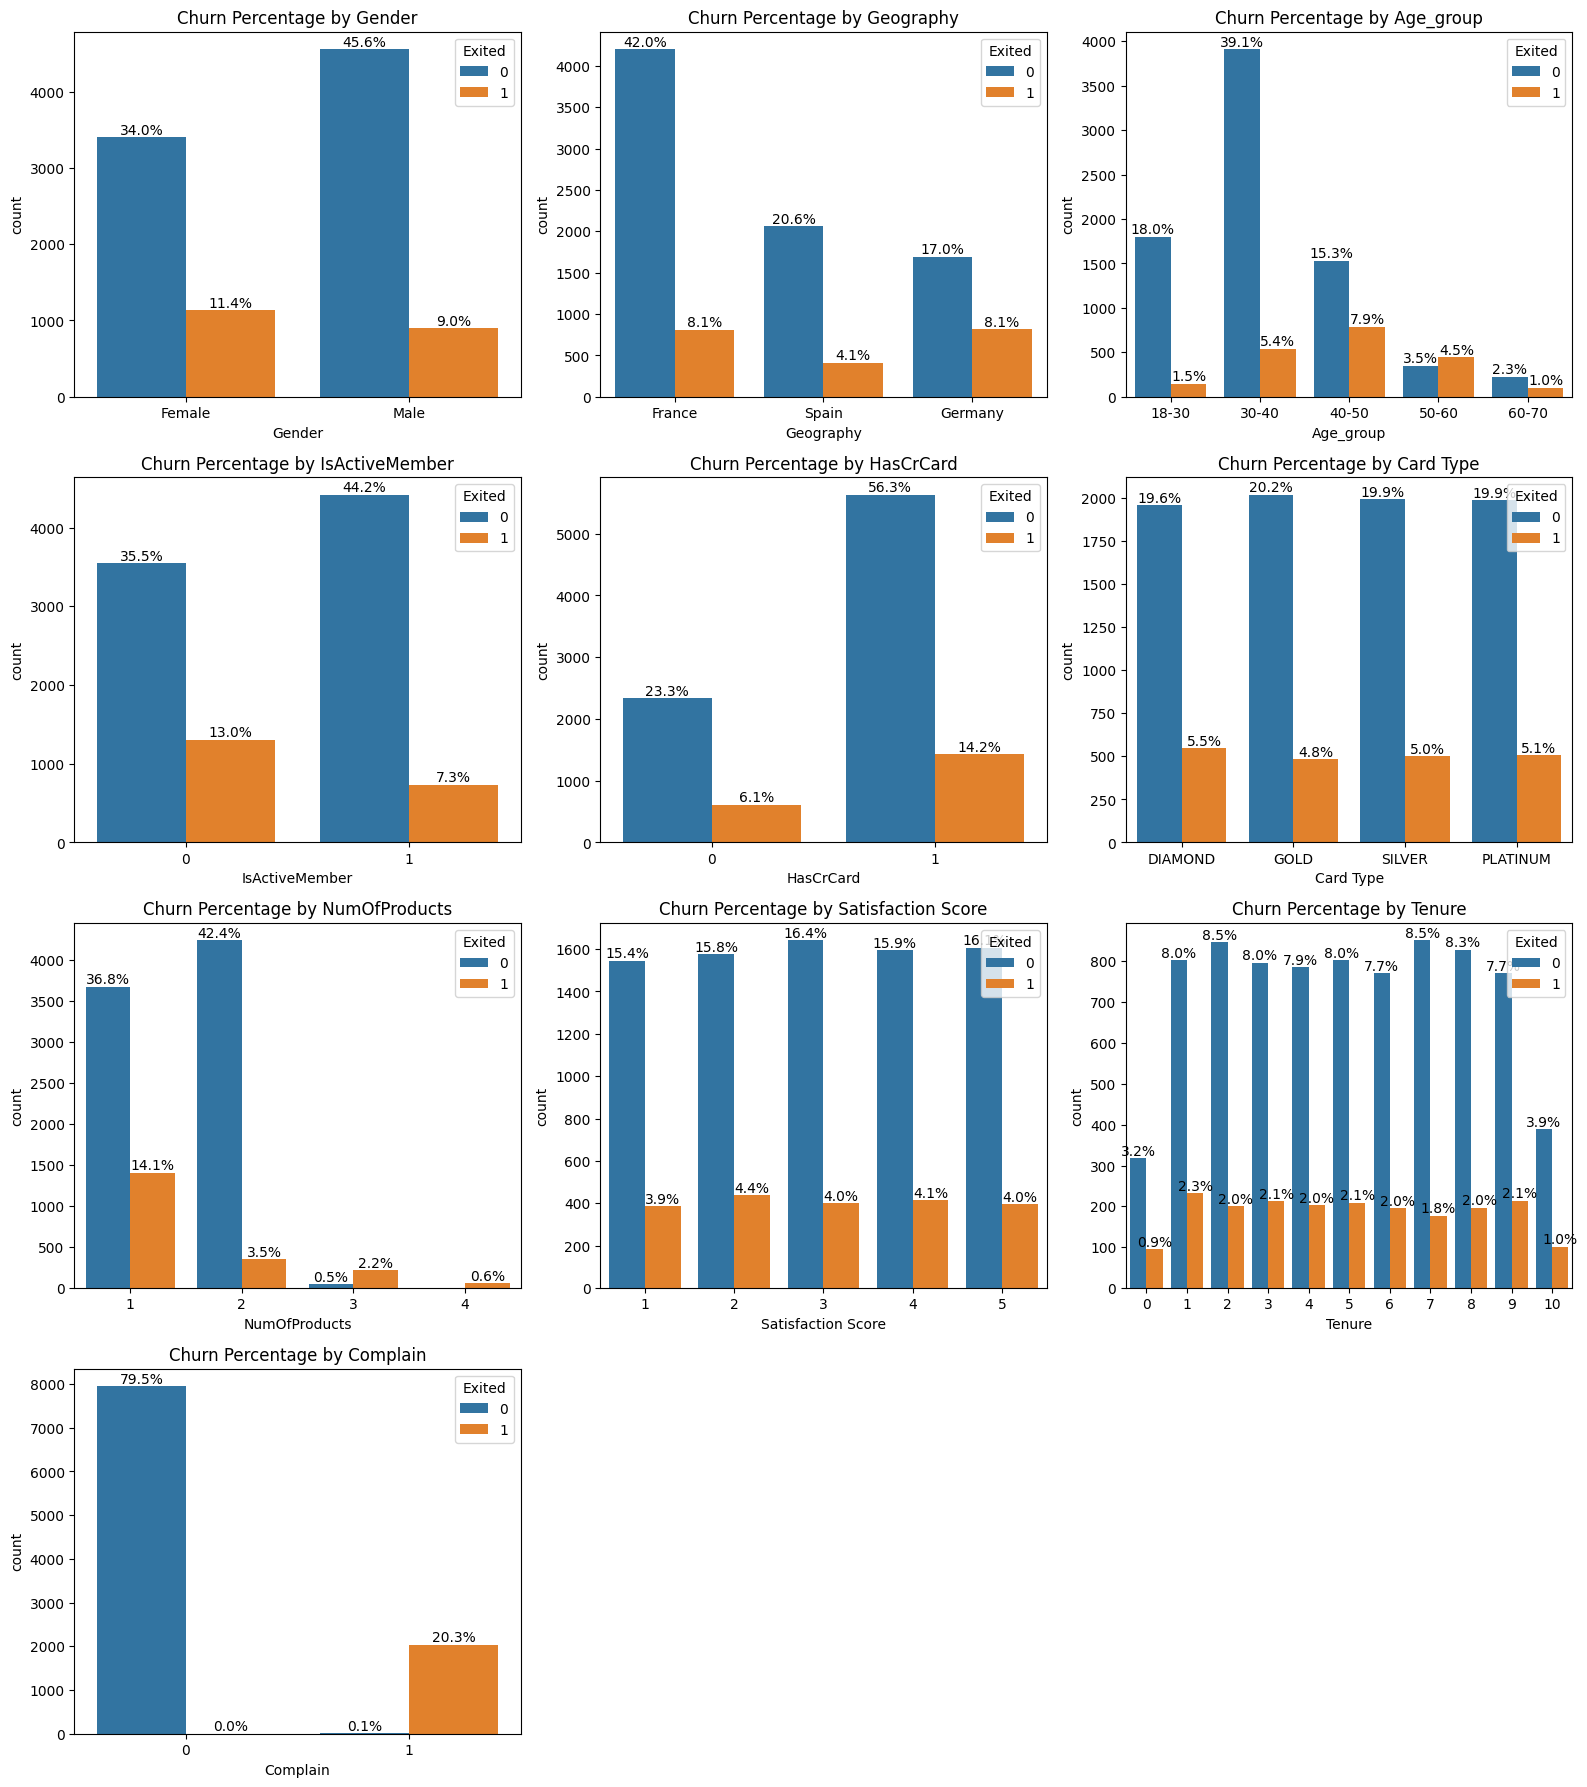

In [ ]:

plt.figure(figsize=(16,22))

cols = ['Gender', 'Geography','Age_group','IsActiveMember','HasCrCard','Card Type', 'NumOfProducts', 'Satisfaction Score', 'Tenure','Complain']
total = len(df)
for i in cols:

  plt.subplot(5,3,cols.index(i)+1)
  plt.title('Churn Percentage by '+i)
  g = sns.countplot(df, x=i, hue='Exited')

  for bars in g.containers:
    g.bar_label(bars, labels=[f'{h / total * 100:.1f}%' for h in bars.datavalues])

plt.tight_layout()
plt.show()

4. Behavioral Analysis

In [ ]:
# H0: NumOfProducts and Exited are not dependent
# H1: NumOfProducts and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['NumOfProducts'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, NumOfProducts and Exited are dependent")
else:
  print("Failed to Reject H0 ,NumOfProducts and Exited are not dependent")

Chi_Statistcs: 1501.5048306588592

P_Value: 0.0

Degree of Freedom: 3

Expected_Value: [[4047.8808 1036.1192]
 [3654.558   935.442 ]
 [ 211.7892   54.2108]
 [  47.772    12.228 ]]

Reject H0, NumOfProducts and Exited are dependent


In [ ]:
# H0: IsActiveMember and Exited are not dependent
# H1: IsActiveMember and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['IsActiveMember'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, IsActiveMember and Exited are dependent")
else:
  print("Failed to Reject H0, IsActiveMember and Exited are not dependent")

Chi_Statistcs: 243.6948024819593

P_Value: 6.153167438113408e-55

Degree of Freedom: 1

Expected_Value: [[3860.7738  988.2262]
 [4101.2262 1049.7738]]

Reject H0, IsActiveMember and Exited are dependent


5. Financial Analysis

In [ ]:
churned_stats = df[df['Exited'] == 1]['Balance'].describe()
not_churned_stats = df[df['Exited'] == 0]['Balance'].describe()

print("Churned Customers Balance Statistics:\n", churned_stats)
print("\nNot Churned Customers Balance Statistics:\n", not_churned_stats)

# H0 : The mean balance of churned customers is equal to the mean balance of non-churned customers.
# Ha : The mean balance of churned customers is not equal to the mean balance of non-churned customers.

churn_balance=df[df['Exited']==1]['Balance']
Non_churn_balance=df[df['Exited']==0]['Balance']

t_statistics, p_value= ttest_ind(churn_balance,Non_churn_balance)

print(f"\nT_Statistcs: {t_statistics}\n")
print(f"P_Value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, The mean balance of churned customers is not equal to the mean balance of non-churned customers.")
else:
  print("Failed to Reject H0, The mean balance of churned customers is equal to the mean balance of non-churned customers.")

Churned Customers Balance Statistics:
 count      2038.000000
mean      91109.476006
std       58346.483197
min           0.000000
25%       38591.222500
50%      109344.230000
75%      131423.637500
max      250898.090000
Name: Balance, dtype: float64

Not Churned Customers Balance Statistics:
 count      7962.000000
mean      72742.750663
std       62851.577108
min           0.000000
25%           0.000000
50%       92063.060000
75%      126419.330000
max      221532.800000
Name: Balance, dtype: float64

T_Statistcs: 11.940747722508185

P_Value: 1.2092076077156017e-32

Reject H0, The mean balance of churned customers is not equal to the mean balance of non-churned customers.


In [ ]:
# H0: HasCrCard and Exited are not dependent
# H1: HasCrCard and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['HasCrCard'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, HasCrCard and Exited are dependent")
else:
  print("Failed to Reject H0, HasCrCard and Exited are not dependent")

Chi_Statistcs: 0.4494039375253385

P_Value: 0.5026181509009862

Degree of Freedom: 1

Expected_Value: [[2344.809  600.191]
 [5617.191 1437.809]]

Failed to Reject H0, HasCrCard and Exited are not dependent


6. Customer Satisfaction and Feedback



In [ ]:
# H0: Complain and Exited are not dependent
# H1: Complain and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['Complain'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, Complain and Exited are dependent")
else:
  print("Failed to Reject H0, Complain and Exited are not dependent")

Chi_Statistcs: 9907.907035880155

P_Value: 0.0

Degree of Freedom: 1

Expected_Value: [[6334.5672 1621.4328]
 [1627.4328  416.5672]]

Reject H0, Complain and Exited are dependent


In [ ]:
df_s=df[df['Complain']==1][['Satisfaction Score','Exited']]


In [ ]:
# H0: Satisfaction Score for complained customer and Exited are not dependent
# H1: Satisfaction Score for complained customer and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df_s['Satisfaction Score'],df_s['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, Satisfaction Score for complained customer and Exited are dependent")
else:
  print("Failed to Reject H0, Satisfaction Score for complained customer and Exited are not dependent")

Chi_Statistcs: 8.220255451847681

P_Value: 0.08383511492614232

Degree of Freedom: 4

Expected_Value: [[  1.89334638 385.10665362]
 [  2.14285714 435.85714286]
 [  1.98630137 404.01369863]
 [  2.02054795 410.97945205]
 [  1.95694716 398.04305284]]

Failed to Reject H0, Satisfaction Score for complained customer and Exited are not dependent


In [ ]:
# H0: Satisfaction Score and Exited are not dependent
# H1: Satisfaction Score and Exited are dependent
chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['Satisfaction Score'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, Satisfaction Score and Exited are dependent")
else:
  print("Failed to Reject H0, Satisfaction Score and Exited are not dependent")

Chi_Statistcs: 3.8027035326309577

P_Value: 0.43336497327743106

Degree of Freedom: 4

Expected_Value: [[1538.2584  393.7416]
 [1603.5468  410.4532]
 [1625.8404  416.1596]
 [1598.7696  409.2304]
 [1595.5848  408.4152]]

Failed to Reject H0, Satisfaction Score and Exited are not dependent


7. Card Usage Analysis



In [ ]:
# H0: Card Type and Exited are not dependent
# H1: Card Type and Exited are dependent

chi_stats,p_value,dof,expected=chi2_contingency(pd.crosstab(df['Card Type'],df['Exited']))

print(f"Chi_Statistcs: {chi_stats}\n")
print(f"P_Value: {p_value}\n")
print(f"Degree of Freedom: {dof}\n")
print(f"Expected_Value: {expected}\n")
alpha = 0.05

if p_value < alpha:
  print("Reject H0, Card Type and Exited are dependent")
else:
  print("Failed to Reject H0, Card Type and Exited are not dependent")

Chi_Statistcs: 5.053223027060927

P_Value: 0.16794112067810177

Degree of Freedom: 3

Expected_Value: [[1996.0734  510.9266]
 [1992.0924  509.9076]
 [1986.519   508.481 ]
 [1987.3152  508.6848]]

Failed to Reject H0, Card Type and Exited are not dependent


In [ ]:
churned_stats = df[df['Exited'] == 1]['Point Earned'].describe()
not_churned_stats = df[df['Exited'] == 0]['Point Earned'].describe()

print("Churned Customers Point Earned Statistics:\n", churned_stats)
print("\nNot Churned Customers Point Earned Statistics:\n", not_churned_stats)

# H0 : The mean Point Earned of churned customers is equal to the mean Point Earned of non-churned customers.
# Ha : The mean Point Earned of churned customers is not equal to the mean Point Earned of non-churned customers.

churn_Point_Earned=df[df['Exited']==1]['Point Earned']
Non_churn_Point_Earned=df[df['Exited']==0]['Point Earned']

t_statistics, p_value= ttest_ind(churn_Point_Earned,Non_churn_Point_Earned)

print(f"\nT_Statistcs: {t_statistics}\n")
print(f"P_Value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, The mean Point Earned of churned customers is not equal to the mean Point Earned of non-churned customers")
else:
  print("Failed to Reject H0, The mean Point Earned of churned customers is equal to the mean Point Earned of non-churned customers")

Churned Customers Point Earned Statistics:
 count    2038.000000
mean      604.448479
std       225.315301
min       163.000000
25%       405.000000
50%       610.500000
75%       793.000000
max      1000.000000
Name: Point Earned, dtype: float64

Not Churned Customers Point Earned Statistics:
 count    7962.000000
mean      607.044084
std       226.091682
min       119.000000
25%       412.000000
50%       603.000000
75%       801.000000
max      1000.000000
Name: Point Earned, dtype: float64

T_Statistcs: -0.4627759848070133

P_Value: 0.6435350184288993

Failed to Reject H0, The mean Point Earned of churned customers is equal to the mean Point Earned of non-churned customers


8. Salary Analysis

Salary and Churn: Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

In [ ]:
churned_stats = df[df['Exited'] == 1]['EstimatedSalary'].describe()
not_churned_stats = df[df['Exited'] == 0]['EstimatedSalary'].describe()

print("Churned Customers EstimatedSalary Statistics:\n", churned_stats)
print("\nNot Churned Customers EstimatedSalary Statistics:\n", not_churned_stats)

# H0 : The mean EstimatedSalary of churned customers is equal to the mean EstimatedSalary of non-churned customers.
# Ha : The mean EstimatedSalary of churned customers is not equal to the mean EstimatedSalary of non-churned customers.

churn_EstimatedSalary=df[df['Exited']==1]['EstimatedSalary']
Non_churn_EstimatedSalary=df[df['Exited']==0]['EstimatedSalary']

t_statistics, p_value= ttest_ind(churn_EstimatedSalary,Non_churn_EstimatedSalary)

print(f"\nT_Statistcs: {t_statistics}\n")
print(f"P_Value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, The mean EstimatedSalary of churned customers is not equal to the mean EstimatedSalary of non-churned customers")
else:
  print("Failed to Reject H0, The mean EstimatedSalary of churned customers is equal to the mean EstimatedSalary of non-churned customers.")

Churned Customers EstimatedSalary Statistics:
 count      2038.000000
mean     101509.908783
std       57932.623392
min          11.580000
25%       51924.020000
50%      102489.335000
75%      152443.857500
max      199808.100000
Name: EstimatedSalary, dtype: float64

Not Churned Customers EstimatedSalary Statistics:
 count      7962.000000
mean      99726.853141
std       57399.956717
min          90.070000
25%       50783.295000
50%       99620.355000
75%      148602.445000
max      199992.480000
Name: EstimatedSalary, dtype: float64

T_Statistcs: 1.2489445044833742

P_Value: 0.2117146135149097

Failed to Reject H0, The mean EstimatedSalary of churned customers is equal to the mean EstimatedSalary of non-churned customers.


Analysis based on Age,Credit Score and Tenure

In [ ]:
churned_stats = df[df['Exited'] == 1]['Age'].describe()
not_churned_stats = df[df['Exited'] == 0]['Age'].describe()

print("Churned Customers Age Statistics:\n", churned_stats)
print("\nNot Churned Customers Age Statistics:\n", not_churned_stats)

# H0 : The mean Age of churned customers is equal to the mean Age of non-churned customers.
# Ha : The mean Age of churned customers is not equal to the mean Age of non-churned customers.

churn_Age=df[df['Exited']==1]['Age']
Non_churn_Age=df[df['Exited']==0]['Age']

t_statistics, p_value= ttest_ind(churn_Age,Non_churn_Age)

print(f"\nT_Statistcs: {t_statistics}\n")
print(f"P_Value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, The mean Age of churned customers is not equal to the mean Age of non-churned customers.")
else:
  print("Failed to Reject H0, The mean Age of churned customers is equal to the mean Age of non-churned customers.")

Churned Customers Age Statistics:
 count    2038.000000
mean       44.835623
std         9.759754
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

Not Churned Customers Age Statistics:
 count    7962.000000
mean       37.408063
std        10.125957
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

T_Statistcs: 29.76379695489027

P_Value: 1.3467162476197306e-186

Reject H0, The mean Age of churned customers is not equal to the mean Age of non-churned customers.


In [ ]:
churned_stats = df[df['Exited'] == 1]['CreditScore'].describe()
not_churned_stats = df[df['Exited'] == 0]['CreditScore'].describe()

print("Churned Customers CreditScore Statistics:\n", churned_stats)
print("\nNot Churned Customers CreditScore Statistics:\n", not_churned_stats)

# H0 : The mean CreditScore of churned customers is equal to the mean CreditScore of non-churned customers.
# Ha : The mean CreditScore of churned customers is not equal to the mean CreditScore of non-churned customers.

churn_CreditScore=df[df['Exited']==1]['CreditScore']
Non_churn_CreditScore=df[df['Exited']==0]['CreditScore']

t_statistics, p_value= ttest_ind(churn_CreditScore,Non_churn_CreditScore)

print(f"\nT_Statistcs: {t_statistics}\n")
print(f"P_Value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, The mean CreditScore of churned customers is not equal to the mean CreditScore of non-churned customers.")
else:
  print("Failed to Reject H0, The mean CreditScore of churned customers is equal to the mean CreditScore of non-churned customers.")

Churned Customers CreditScore Statistics:
 count    2038.000000
mean      645.414622
std       100.337351
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

Not Churned Customers CreditScore Statistics:
 count    7962.000000
mean      651.837855
std        95.650047
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

T_Statistcs: -2.6778368664704235

P_Value: 0.0074220372427342435

Reject H0, The mean CreditScore of churned customers is not equal to the mean CreditScore of non-churned customers.


In [ ]:
churned_stats = df[df['Exited'] == 1]['Tenure'].describe()
not_churned_stats = df[df['Exited'] == 0]['Tenure'].describe()

print("Churned Customers Tenure Statistics:\n", churned_stats)
print("\nNot Churned Customers Tenure Statistics:\n", not_churned_stats)

# H0 : The mean Tenure of churned customers is equal to the mean Tenure of non-churned customers.
# Ha : The mean Tenure of churned customers is not equal to the mean Tenure of non-churned customers.

churn_Tenure=df[df['Exited']==1]['Tenure']
Non_churn_Tenure=df[df['Exited']==0]['Tenure']

t_statistics, p_value= ttest_ind(churn_Tenure,Non_churn_Tenure)

print(f"\nT_Statistcs: {t_statistics}\n")
print(f"P_Value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("Reject H0, The mean Tenure of churned customers is not equal to the mean Tenure of non-churned customers.")
else:
  print("Failed to Reject H0, The mean Tenure of churned customers is equal to the mean Tenure of non-churned customers.")

Churned Customers Tenure Statistics:
 count    2038.000000
mean        4.934740
std         2.936768
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64

Not Churned Customers Tenure Statistics:
 count    7962.000000
mean        5.032781
std         2.880496
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

T_Statistcs: -1.365570678788837

P_Value: 0.1721044754880606

Failed to Reject H0, The mean Tenure of churned customers is equal to the mean Tenure of non-churned customers.


# Insights:

* Gender:
    * An analysis of the churn data reveals that 11.4% of female customers have exited, a rate that is higher compared to male customers.
    * This suggests that gender may play a role in customer churn, with female customers being more likely to leave.
    * The test results indicate that there is a significant dependency between Gender and churn status.

* Geography:
    * Customers from France and Germany have higher churn rates around 8.1% compared to Spain region which is around 4.1% churn rate.
    * The test results indicate that there is a significant dependency between Geography and churn status.

* Age Group:
    * The age group 40-50 experiences a higher churn rate of approximately 7.9%, indicating that customers within this age range are more likely to exit.
    * The age group 30-40 shows a higher retention rate of about 39.1%, suggesting that customers in this age range are more likely to stay.
    * The test results indicate that there is a significant dependency between age group and churn status.
    * The mean age of churned customers is different from the mean age of non-churned customers, suggesting that age plays a role in customer churn.

* IsActiveMember:
    * Active members have a lower churn rate of 7.3% compared to inactive members, who have a churn rate of 13%.
    * The test results indicate that there is a significant dependency between IsActiveMember and churn status.

* HasCrCard:
    * The presence of a credit card does not significantly affect the churn rate, indicating it is not a strong predictor of customer exit.
    * The test results indicate that there is a no significant dependency between HasCrCard and churn status.

* Card Type:
    * Certain card types are associated with different churn rates, with some types having higher retention.
    * The test results indicate that there is a no significant dependency between Card Type and churn status.

* NumOfProducts:
    * Customers with more products tend to have lower churn rates, reinforcing the idea that cross-selling products can improve retention.
    * The test results indicate that there is a significant dependency between NumOfProducts and churn status.

* Satisfaction Score:
    * Lower satisfaction scores correlate with higher churn rates, highlighting the importance of customer satisfaction in retention.
    * The test results indicate that there is a no significant dependency between Card Type and churn status.

* Complain:
    * Customers who have lodged complaints have a significantly higher churn rate, indicating that addressing complaints is crucial for reducing churn.
    * The test results indicate that there is a significant dependency between NumOfProducts and churn status.

* Credit Score:
    * There is a weak correlation between credit score and churn (Exited), indicating that credit score alone is not a strong predictor of churn.
    * Churned customers might have different credit score distributions compared to non-churned customers, suggesting that credit score is a potential factor in churn.
    * The test results indicate that the mean CreditScore of churned customers is not equal to the mean CreditScore of non-churned customers.

* Tenure:
    * There is a negative correlation between tenure and churn (Exited), indicating that customers with longer tenures are less likely to churn.
    * The test results indicate that the mean Tenure of churned customers is equal to the mean Tenure of non-churned customers.

* Balance:
    * Positive Correlation between Balance and Exited.
    * Higher account balances may be associated with higher churn rates, as indicated by the distribution and boxplots.
    * The test results indicate that the mean balance of churned customers is not equal to the mean balance of non-churned customers.

* Estimated Salary:
    * The weak correlation between estimated salary and churn is reflected in the similar distributions and boxplots for both churned and non-churned customers, suggesting that points earned may not strongly predict churn.
    * The test results indicate that the mean EstimatedSalary of churned customers is equal to the mean EstimatedSalary of non-churned customers.

* Point Earned:
    * The weak correlation between points earned and churn is reflected in the data, suggesting that points earned may not strongly predict churn.
    * The test results indicate that the mean Point Earned of churned customers is equal to the mean Point Earned of non-churned customers

# Recommendations:

* Gender:
    * Implement targeted retention strategies focusing on reducing churn among female customers, who exhibit a higher exit rate compared to males.

* Geography:
    * Tailor retention efforts to address higher churn rates in specific regions such as France and Germany. Understand regional preferences and concerns to improve retention strategies.

* Age Group:
    * Customize marketing and service offerings to better cater to age groups with higher retention rates, particularly customers aged 30-40. Consider age-specific loyalty programs or incentives.

* IsActiveMember:
    * Encourage inactive members to become more engaged through targeted outreach and communication. Highlight the benefits of active membership to reduce churn among this segment.

* HasCrCard:
    * Ensure that customers are aware of the benefits associated with having a credit card. While it may not significantly impact churn, emphasize features that could enhance engagement.

* NumOfProducts:
    * Promote cross-selling initiatives to increase the number of products used by customers, as this correlates with lower churn rates. Offer bundled services or discounts to encourage product diversification.

* Satisfaction Score:
    * Improve overall customer satisfaction by addressing feedback from customers with lower satisfaction scores. Enhance service delivery and communication to boost satisfaction levels and reduce churn risk.

* Complain:
    * Prioritize efficient complaint resolution processes to enhance customer retention. Train staff to handle complaints promptly and effectively to prevent dissatisfaction and potential churn.

* Credit Score:
    * Monitor customers with lower credit scores closely for potential churn risks. Offer financial management tools or personalized advice to support their financial wellness and increase retention.

* Tenure:
    * Recognize long-standing customers with exclusive benefits or rewards to reinforce loyalty. Implement retention strategies that acknowledge and appreciate customer tenure.

* Balance:
    * Manage accounts with higher balances proactively to prevent churn. Offer personalized financial planning or investment options to engage customers with substantial account balances.

* Estimated Salary and Points Earned:
    * While weakly correlated with churn, continue monitoring customer engagement levels based on estimated salary and points earned. Tailor promotional offers or rewards based on spending behaviors to enhance retention efforts.